# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
Задача: нужно научиться определять рыночную стоимость объектов недвижимости, устанавливать параметры, находить взаимосвязи между параметрами. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Открываем файл и изучаем общую информацию о нем.

In [2]:
#Добавляем необходимые библиотеки и считываем базу данных, сохряняя ее в переменную flats
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

try:
    flats = pd.read_csv('D:/Practicum/Аналитика данных/Исследовательнский анализ данных/Проект/real_estate_data.csv', sep='\t')
except:
    flats = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')

In [3]:
#выводим основную информацию о датафрейме
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Название стоблца с расстоянием до центра лучше переименовать в соответствии со стилем 'snake case'. В датафрейме довольно много пропусков, особенно в тех данных, что получены автоматически. 

In [4]:
#переименовываю столбец
flats = flats.rename(columns = {'cityCenters_nearest' : 'city_centres_nearest'})

In [5]:
#выводим общие характеристики для каждого столбца
flats.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centres_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
#смотрим первые 10 строек датафрейма
flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centres_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [7]:
#смотрим кол-во пропусков для каждого столбца
flats.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centres_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#возможные зависимости столбцов
flats.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centres_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Здесь можно заметить, что общая площадь взаимосвязано с кол-вом комнат, жилой площадью и площадью кухни.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centres_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

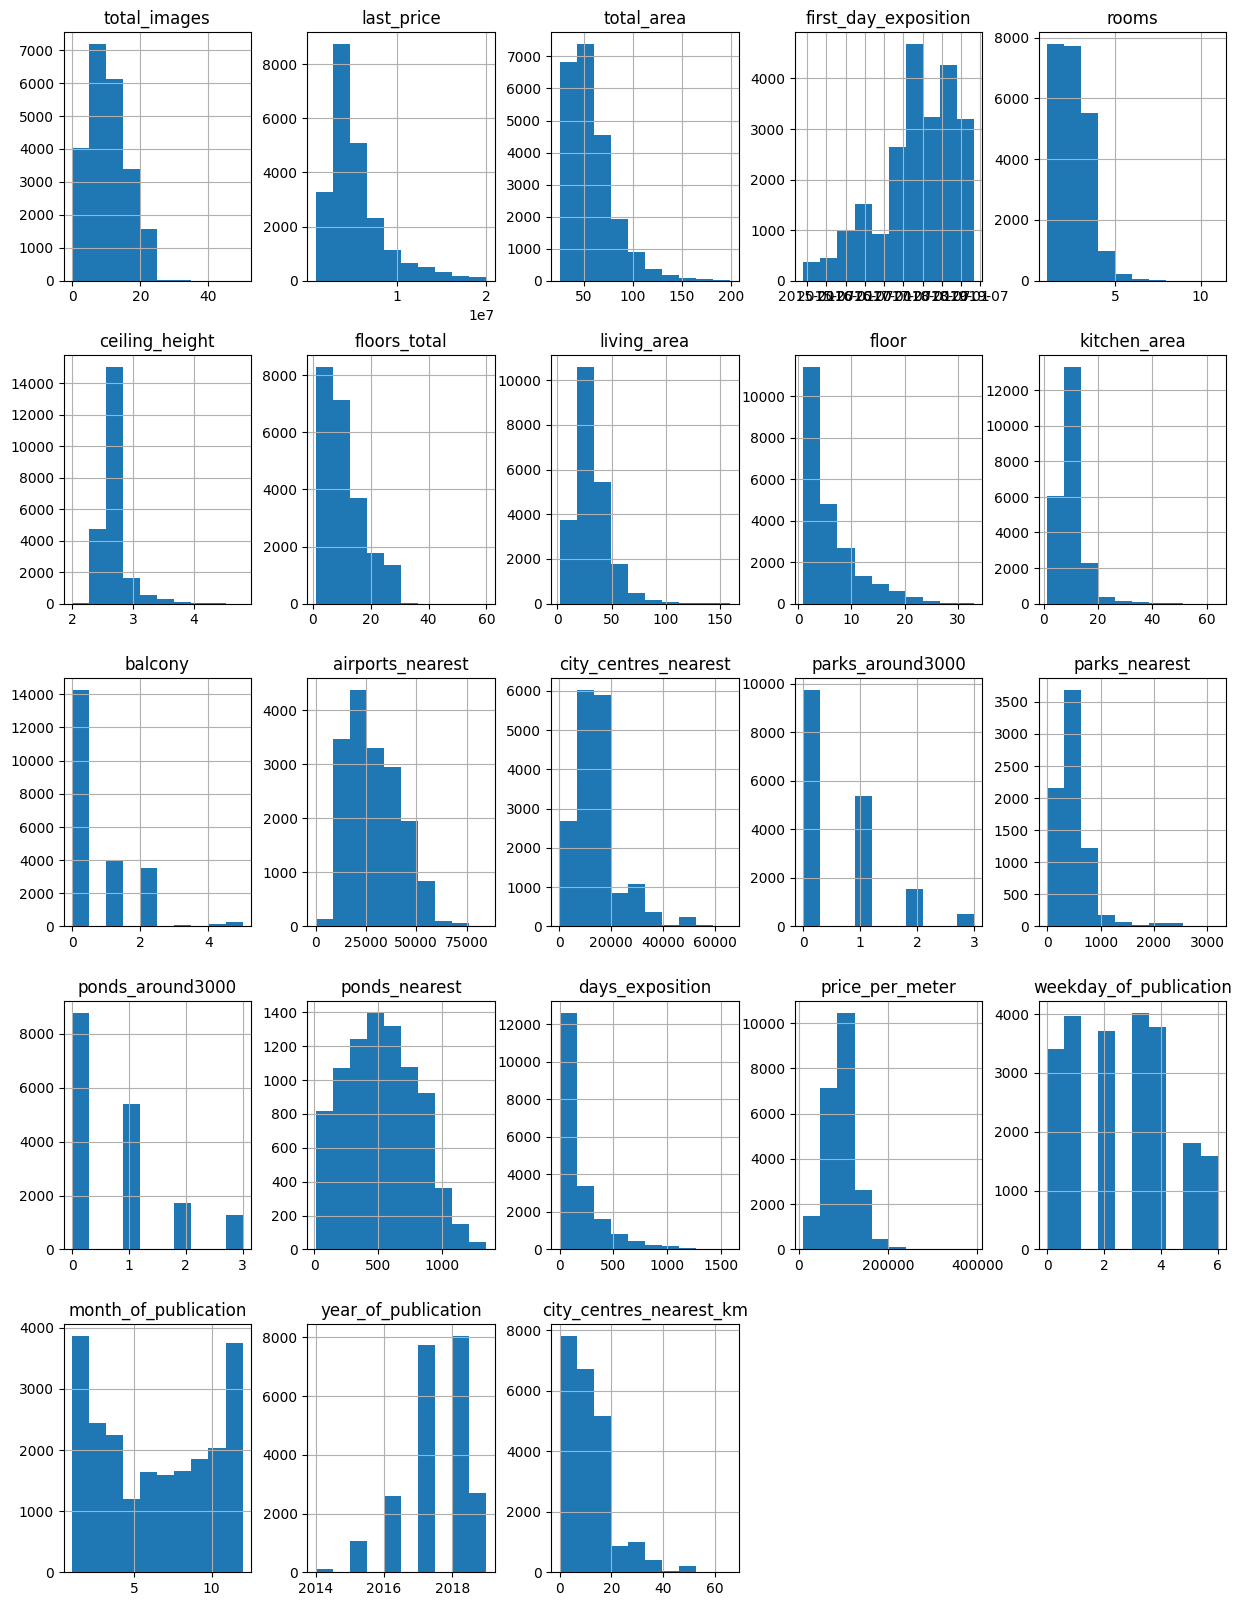

In [84]:
flats.hist(figsize=(15, 20))

## Предобработка данных

В каждом столбце по возможности будем заполнять пропуски, аномальные значения убирать.

### Высота потолков

In [9]:
#ищем аномально высокие потолки
flats['ceiling_height'].sort_values(ascending=False)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
         ...  
23687      NaN
23690      NaN
23692      NaN
23695      NaN
23696      NaN
Name: ceiling_height, Length: 23699, dtype: float64

In [10]:
#ищем аномально низкие потолки
flats['ceiling_height'].sort_values()

22590    1.00
5712     1.20
16934    1.75
2572     2.00
19329    2.00
         ... 
23687     NaN
23690     NaN
23692     NaN
23695     NaN
23696     NaN
Name: ceiling_height, Length: 23699, dtype: float64

In [11]:
#смотрим основные параметры по столбцу
flats['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Для начала приведем ту высоту, которая скорее всего была прописана из-за человечекого фактора, например, поставив высоту 25 м вместо 2,5м.

In [12]:
flats.loc[flats.query('20 < ceiling_height <= 100').index, 'ceiling_height'] = \
flats.loc[flats.query('20 < ceiling_height <= 100').index, 'ceiling_height'] / 10

Далее заполняем пропуски и неправдоподобно маленькие или большие потолки на медианное значения столбца(< 2м или > 5м).

In [13]:
flats.loc[flats.query('ceiling_height < 2 or 5 < ceiling_height <= 20').index, 'ceiling_height'] = \
flats['ceiling_height'].median()
flats['ceiling_height'] = flats['ceiling_height'].fillna(flats['ceiling_height'].median())

<AxesSubplot:>

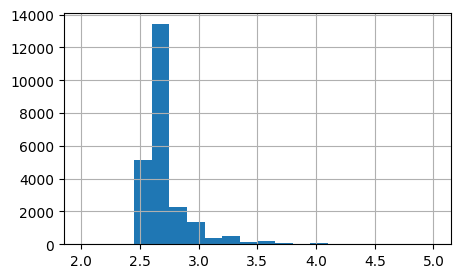

In [14]:
#Строим диаграмму чтобы посмотреть на распределение
flats['ceiling_height'].hist(bins=20, range=(2,5), figsize=(5,3))

Распределение соответствует ожиданиям, большинство квартир имеют высоту потолков 2,4 - 2,7 м. Потолки большей высоты имеют место быть, например, в элитных квартирах. 

### Общее количество этажей

Построим гистограмму чтобы посмотреть распределение.

<AxesSubplot:>

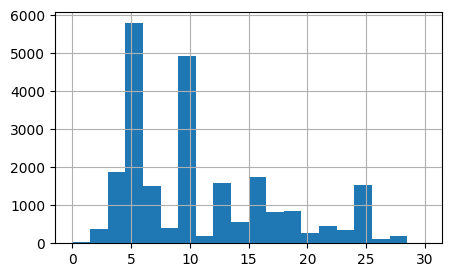

In [15]:
flats['floors_total'].hist(bins=20, range=(0,30), figsize=(5,3))

Судя по графику данные корректные. Большинство домов этажностью 5, 9, 12, 17, как в целом по стране, ведь раньше такие были стандарты. 

Заполним пропуски в столбце.

In [16]:
flats['floors_total'] = flats['floors_total'].fillna(flats['floors_total'].median())

Так как кол-во этажей всегда целое число, то необходимо поменять тип столбца на целочисленный.

In [17]:
flats['floors_total'] = flats['floors_total'].astype('int')

Посмотрим значения столбца.

In [18]:
flats.groupby('floors_total')['floors_total'].count()

floors_total
1       25
2      383
3      668
4     1200
5     5788
6      914
7      592
8      390
9     3847
10    1174
11     203
12    1362
13     229
14     553
15     365
16    1376
17     833
18     505
19     339
20     271
21     158
22     286
23     352
24     469
25    1075
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       3
37       1
52       1
60       1
Name: floors_total, dtype: int64

Аномальных значений не обнаружено. Домов с высокой этажностью немного и они не выбиваются из логики, ведь есть действительно высокие дома по типу Москва-сити в столице.

### Этаж

Посмотрим распределение этажей в объявлениях.

<AxesSubplot:ylabel='Frequency'>

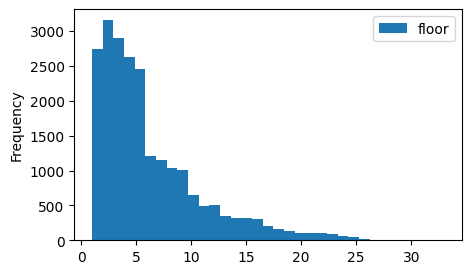

In [83]:
flats.plot(kind='hist', bins=33, y='floor', figsize=(5,3))

In [19]:
flats.groupby('floor')['floor'].count()

floor
1     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

Ничего сверхестесвенного. Однако после заполнения общего числа этажей в доме в предыдущем пункте, может так получится, что этаж в квартиры в доме больше общего количества этажей в этом же самом доме. Необходимо найти такие квартиры и посчитать.

In [20]:
flats[flats['floor'] > flats['floors_total']]['floors_total'].count()

37

Таких квартир немного, поэтому ими можно пренебречь.

In [21]:
#Убираем строки, где этаж квартиры выше общего кол-ва этажей в доме.
flats = flats[flats['floor'] <= flats['floors_total']]

#### Жилая площадь

Посмортим распределение на гистограмме.

<AxesSubplot:>

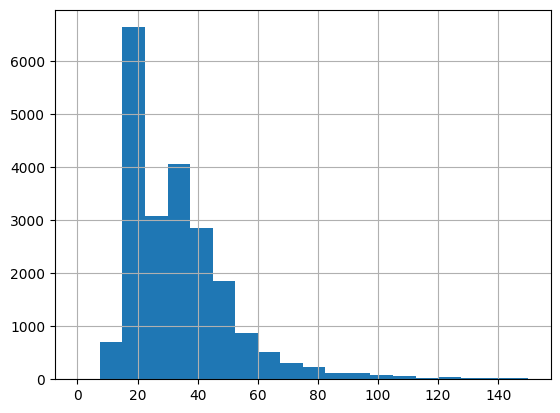

In [22]:
flats['living_area'].hist(bins=20, range=(0,150))

Видно два пика, однако ничего необычного, это однокомнатные и двухкомнатные квартиры.

Заполним пустые значения медианным значением столбца жилой площади, среднее значение имеет неточность засчет очень больших квартир.

In [23]:
flats['living_area'] = flats['living_area'].fillna(flats['living_area'].median())

После добавления медианы может оказаться так, что жилая площь больше общей, это невозможно, необходимо проверить.

In [24]:
flats[flats['living_area'] > flats['total_area']]['total_area'].count()

76

В сравнении с общей базой данных этими данными можно пренебречь.

In [25]:
flats = flats[flats['living_area'] < flats['total_area']]

### Проверка на аппартаменты

Сначала посмотрим какие значения принимает столбец is_apartment.

In [26]:
flats['is_apartment'].unique()

array([nan, False, True], dtype=object)

Заполняем False, так как человек просто не заполняет эту графу, если квартира не аппартамент. Значения в столбце 'is_apartment' должны иметь тип bool, ведь жилплощадь это квартира или аппартаменты, другого не дано.

In [27]:
flats['is_apartment'] = flats['is_apartment'].fillna('False')
flats['is_apartment'] = flats['is_apartment'].astype('bool')

### Площадь кухни

По логике вещей можно предположить, что чем больше общая площадь, тем больше и площадь кухни. Давайте это проверим.

In [28]:
flats['total_area'].corr(flats['kitchen_area'])

0.608984530031644

Корреляция в 0,61 говорит о наличии связи, однако не сильно большой.Выходит увеличение общей площади сопровождается увеличением площади кухни, но так бывает не всегда.

Посмотрим распределение площаей общей и площади кузни на гистограмме.

<AxesSubplot:ylabel='Frequency'>

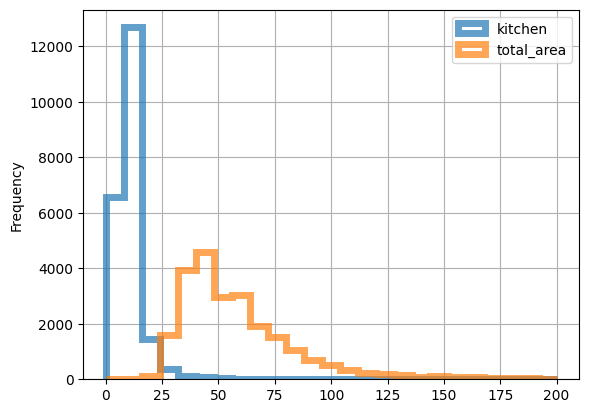

In [29]:
ax = flats.plot(
    kind='hist',
    y='kitchen_area',
    histtype='step',
    bins=25,
    range=(0,200),
    linewidth=5,
    alpha=0.7,
    label='kitchen',
)
flats.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    bins=25,
    range=(0,200),
    linewidth=5,
    alpha=0.7,
    label='total_area',
    ax=ax,
    grid=True,
    legend=True,
)

Из гистограммы видно, что, действительно, чем больше площадь, тем больше кухня, но чем больше общая площадь, тем больше она разрастается засчет жилой, а не кухонной. Поэтому пропуски также заполняем медианным значением стобца площади кухни, а не связываем с общей площадью.

In [30]:
flats['kitchen_area'] = flats['kitchen_area'].fillna(flats['kitchen_area'].median())

### Кол-во балконов

Пропуски в стобце балконов заполняем нулями, так как люди просто не заполняли. если балкона нет.

In [31]:
flats['balcony'] = flats['balcony'].fillna(0)

### Название населенного пункта

Здесь пропуски заполнить не получится, однако поработать со столбцом все равно нужно. Тут наверняка есть неявные дубликаты, которые нужно убрать.

In [32]:
print(f'Кол-во уникальных названий до объединения: {len(flats["locality_name"].unique())}')
flats['locality_name'].unique()

Кол-во уникальных названий до объединения: 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В столбце имеются неявные дубликаты (к примеру 'городской посёлок', 'поселок городского типа', 'посёлок городского типа', 'городской поселок'), их необходимо обработать.

In [33]:
flats['locality_name'] = flats['locality_name'].str.replace('ё', 'е') #замена буквы "ё" на "е"
flats['locality_name'] = flats['locality_name'].str.replace('поселок городского типа', 'поселок') #замена на одинаковые значения
flats['locality_name'] = flats['locality_name'].str.replace('городской поселок', 'поселок') #замена на одинаковые значения
print(f'Кол-во уникальных названий после объединения: {len(flats["locality_name"].unique())}')

Кол-во уникальных названий после объединения: 322


In [34]:
flats['locality_name'].isna().sum()

49

В столбце всего 49 пропусков, ими можно пренебречь в сравнении с общим кол-вом строк.

In [35]:
flats = flats.dropna(subset=['locality_name'])

### Дата публикации

Столбец "first_day_exposition" необходимо преобразовать в datetime чтобы в дальнейшем его можно было анализировать или доставать из него какие-либо данные, например день или месяц публикации.

In [36]:
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

## Добавление новых столбцов

### Цена одного квадратного метра

Цена одного метра это отношение общей цены квартиры к общей ее площади.

In [37]:
flats['price_per_meter'] = flats['last_price'] / flats['total_area']

Посмотрим распределение цены на гистограмме.

<AxesSubplot:ylabel='Frequency'>

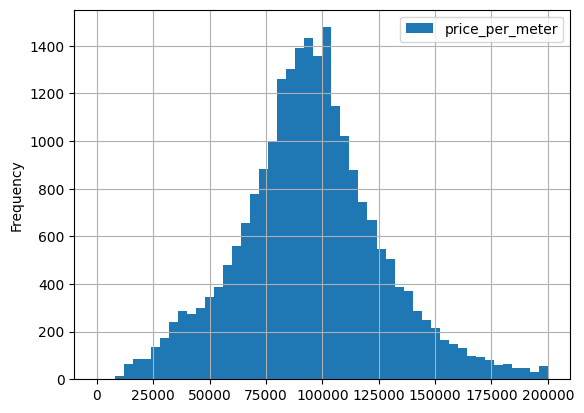

In [38]:
flats.plot(kind='hist', grid=True, y='price_per_meter', bins=50, range=(0,200000))

Распределение имеет нормальны вид.

### День публикации объявления

Добавляем день недели публикации, где 0 - пн, 1 - вт и тд и смотрим, как распределяются дни недели.

In [39]:
flats['weekday_of_publication'] = flats['first_day_exposition'].dt.weekday
flats.groupby('weekday_of_publication')['weekday_of_publication'].count()

weekday_of_publication
0    3591
1    4148
2    3936
3    4271
4    3977
5    1918
6    1679
Name: weekday_of_publication, dtype: int64

<AxesSubplot:ylabel='Frequency'>

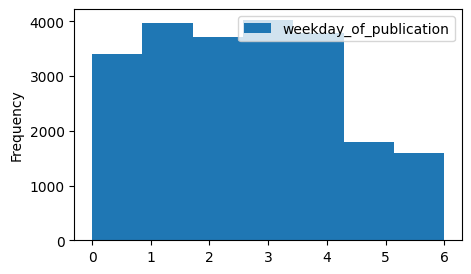

In [85]:
flats.plot(kind='hist', y='weekday_of_publication',bins=7, figsize=(5,3))

### Месяц публикации объявления

Добавляем месяц публикации, где 1 - январь, 2 - февраль и тд и смотрим, как распределяются месяца.

In [40]:
flats['month_of_publication'] = flats['first_day_exposition'].dt.month
flats.groupby('month_of_publication')['month_of_publication'].count()

month_of_publication
1     1478
2     2626
3     2566
4     2357
5     1262
6     1744
7     1683
8     1731
9     1968
10    2117
11    2361
12    1627
Name: month_of_publication, dtype: int64

<AxesSubplot:ylabel='Frequency'>

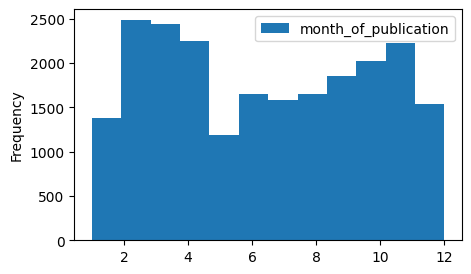

In [86]:
flats.plot(kind='hist', y='month_of_publication',bins=12, figsize=(5,3))

### Год публикации объявления

Добавляем год публикации и смотрим, как распределяются года.

In [41]:
flats['year_of_publication'] = flats['first_day_exposition'].dt.year
flats.groupby('year_of_publication')['year_of_publication'].count()

year_of_publication
2014     136
2015    1167
2016    2752
2017    8151
2018    8455
2019    2859
Name: year_of_publication, dtype: int64

<AxesSubplot:ylabel='Frequency'>

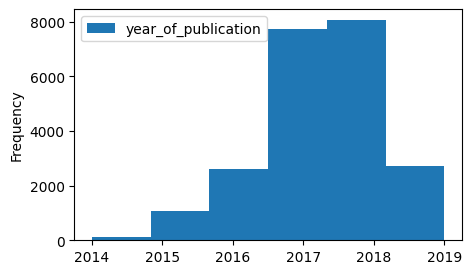

In [87]:
flats.plot(kind='hist', y='year_of_publication',bins=6, figsize=(5,3))

### Тип этажа квартиры(первый, последний, другой)

Как правило первый и последний этажи выделяют и не все хотят их покупать, поэтому сделаем категорию для этажей: первый, последний и другой. Для этого напишем функцию и применим ее к датафрейму.

In [42]:
def categorize_floor(income):
    """
    функция категоризации этажа
    """
    try:
        if income['floor'] == 1:
            return 'первый'
        elif income['floor'] == income['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [43]:
flats['type_of_floor'] = flats.apply(categorize_floor, axis=1)

Посмотрим, какие этажи преобладают.

In [44]:
flats.groupby('type_of_floor')['type_of_floor'].count()

type_of_floor
другой       17310
первый        2893
последний     3317
Name: type_of_floor, dtype: int64

<AxesSubplot:xlabel='type_of_floor'>

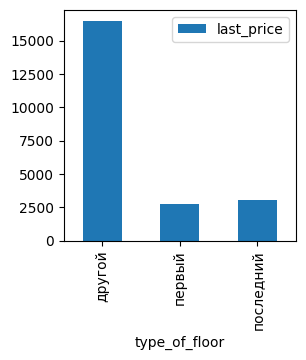

In [88]:
(
    flats.pivot_table(index='type_of_floor', values='last_price', aggfunc='count')
    .plot(kind='bar', figsize=(3,3))
)

Нормально распределение.

### Расстояние до центра города в км

Для удобства анализа и представления переведем расстояние до центра города в километры.

In [45]:
flats['city_centres_nearest_km'] = (flats['city_centres_nearest'] / 1000).round(1)

## Исследовательский анализ данных

### Финальная цена

Посмотрим на гистограмме, как распределяется цена в публикациях.

<AxesSubplot:ylabel='Frequency'>

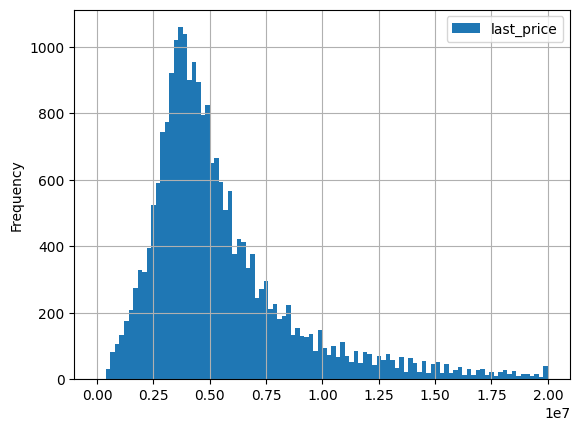

In [46]:
flats.plot(kind='hist', y='last_price', bins=100, grid=True, range=(0,20000000))

In [47]:
flats[(flats['last_price'] > 20000000) | (flats['last_price'] < 1000000)]['last_price'].count()

924

Кол-во квартир стоимостью более 20 млн и менее 1 млн рублей совсем мало(менее 5%), поэтому их можно исключить.

In [48]:
flats = flats[(flats['last_price'] > 1000000) & (flats['last_price'] < 20000000)]

<AxesSubplot:ylabel='Frequency'>

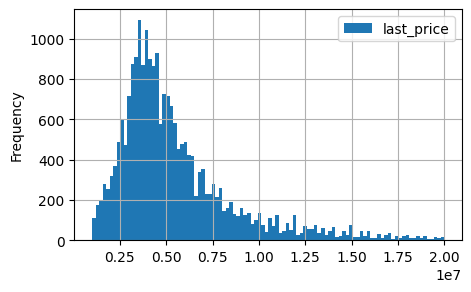

In [49]:
flats.plot(kind='hist', y='last_price', bins=100, grid=True, range=(1000000,20000000), figsize=(5,3))

Медианная цена порядка 4,5 млн рублей.

### Общая площадь

Посмотрим на гистограмме, как распределяется общая площадь.

<AxesSubplot:ylabel='Frequency'>

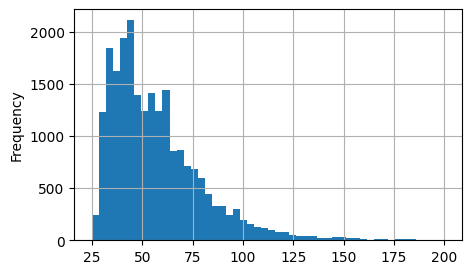

In [50]:
flats['total_area'].plot(kind='hist', grid=True, bins=50, range=(25,200), figsize=(5,3))

Абсолютное большинство квартир имеют площадь менее 200 кв м, поэтому остальные можем исключить, также исключаем слишком маленькие квартиры, скаже меньше 25 м.

In [51]:
flats = flats[(flats['total_area'] > 25) & (flats['total_area'] < 200)]

Медианная площадь квартир 45 - 50 метров.

### Количество комнат

Посмотрим как распределяются квартиры в зависимости от кол-ва комнат. 

<AxesSubplot:ylabel='Frequency'>

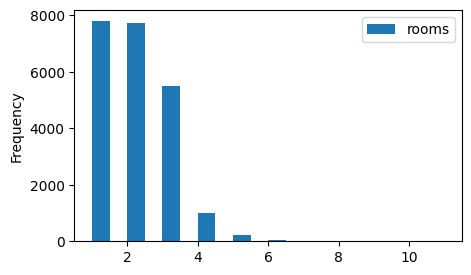

In [82]:
flats.plot(y='rooms', kind='hist', bins=20, figsize=(5,3))

In [53]:
flats.groupby('rooms')['rooms'].count()

rooms
0      112
1     7713
2     7728
3     5508
4      988
5      217
6       49
7       13
8        1
11       1
Name: rooms, dtype: int64

In [54]:
flats[flats['rooms'] == 11]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_of_publication,month_of_publication,year_of_publication,type_of_floor,city_centres_nearest_km
648,3,17500000.0,183.7,2018-07-01,11,3.4,7,138.8,7,True,...,NaN,0.0,NaN,NaN,95264.01742,6,7,2018,последний,3.1


In [55]:
flats[flats['rooms'] == 8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_of_publication,month_of_publication,year_of_publication,type_of_floor,city_centres_nearest_km
8758,5,16100000.0,150.0,2018-07-10,8,2.92,5,107.0,1,True,...,473.0,0.0,NaN,NaN,107333.333333,1,7,2018,первый,4.8


Квартиры с числом комнат 8 и 11 имеют высокую стоимость и большую площадь, не похоже, что кто-то ошибся при вводе данных, так что эти значения оставляем. А вот квартиры с числом комнат = 0 настораживают. Возможно это студии или квартиры со свободной планировкой, сейчас выясним.

In [56]:
# считаем кол-во квартир с 0 комнатами и студии
flats[(flats['rooms'] == 0) & (flats['studio'] == True)]['rooms'].count()

77

In [57]:
# считаем кол-во квартир с 0 комнатами и свободной планировкой
flats[(flats['rooms'] == 0) & (flats['open_plan'] == True)]['rooms'].count()

35

In [58]:
# считаем кол-во квартир с 0 комнатами, студии и со свободной планировкой
flats[(flats['rooms'] == 0) & (flats['studio'] == True) & (flats['open_plan'] == True)]['rooms'].count()

0

Предыдущее предположение подтвердилось, квартиры-студии c нулем комнат можно приравнять к квартирам с одной комнатой, а комнаты со свободной планировкой можно убрать в связи с тем, что их совсем немного.

In [59]:
#Убираем квартиры со свободной планировкой
flats = flats[flats['open_plan'] == False]

In [60]:
# Меняем квартиры студии на квартиры с одной комнатой
flats.loc[flats.query('rooms == 0 and studio == True').index, 'rooms'] = 1

In [61]:
# смотрим, что получилось после преобразования
flats.groupby('rooms')['rooms'].count()

rooms
1     7787
2     7727
3     5506
4      987
5      217
6       49
7       13
8        1
11       1
Name: rooms, dtype: int64

Нули у комнат убрали, значения распределены без аномалий.

### День и месяц публикации объявления

Посмотрим, когда чаще всего люди выкладывали свои объявления. Можно построить две отдельные диаграммы для дня недели и месяца, а можно объединить в графике, поделенном на шестиугольные области.

<AxesSubplot:xlabel='month_of_publication', ylabel='weekday_of_publication'>

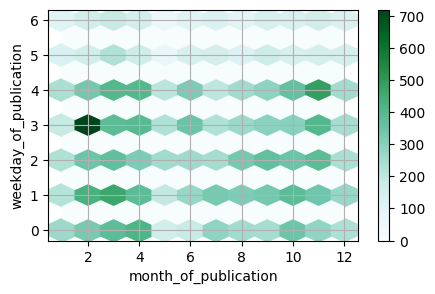

In [62]:
flats.plot(kind='hexbin', x='month_of_publication', y='weekday_of_publication', gridsize=11, \
           sharex=False, grid=True, figsize=(5,3))

Отсюда видно, что по выходным выкладывают намного реже объявления, чем по будням. Также видны наиболее активные месяцы - это с февраля по апрель и с сентября по ноябрь.

### Скорость продажи квартир

Посмотрим насколько быстро продавались квартиры.

<AxesSubplot:ylabel='Frequency'>

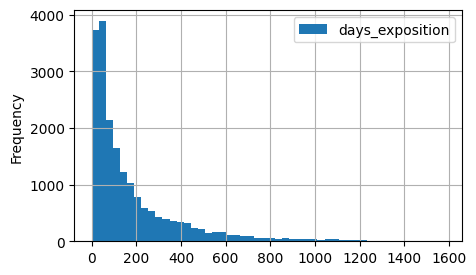

In [63]:
flats.plot(kind='hist', y='days_exposition', grid=True, bins = 50, figsize=(5,3))

Построим диаграмму размаха чтобы понять, какие квартиры можно считать долгопродающимися, а также основные характеристики.

In [64]:
flats['days_exposition'].describe()

count    19390.000000
mean       178.960805
std        217.474256
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

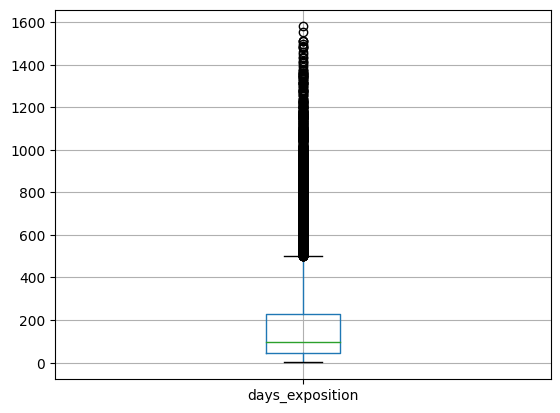

In [65]:
flats.boxplot('days_exposition')

Нижний ус упирается в ноль, верхний расположен в районе 500. Это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Соответственно квартиры, продающиеся более 500 дней можно считать долгопродающимися. Отсюда можно сделать вывод, что объявления, снятые в первый день можно считать быстрыми, а те, что висят более 500 дней долгими.

Посмотрим поподробнее оъявление, снятие в течение полугода.

<AxesSubplot:ylabel='Frequency'>

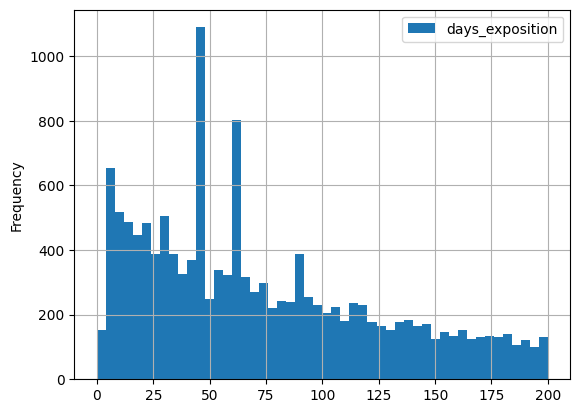

In [66]:
flats.plot(kind='hist', y='days_exposition', grid=True, bins = 50, range=(0,200))

In [67]:
flats['days_exposition'].value_counts().sort_values(ascending=False).head(10)

45.0    804
60.0    534
7.0     224
30.0    203
4.0     169
90.0    169
3.0     151
14.0    141
5.0     140
20.0    135
Name: days_exposition, dtype: int64

Есть некие локальные выбросы по значениям 7, 30, 45, 60 и 90. Это стандартное время размещения объявлений на Яндекс.Недвижимости, следовательно по окончании купленного времени объявления снимаются автоматически, поэтому выбросы здесь вполне объяснимы, их оставляем.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Для начала найдем 10 населенных пунквто с наибольшим числом объявлений.

In [68]:
top_10_town = flats['locality_name'].value_counts().head(10)

Далее создадим сводную таблицу по значениям этих населенных пунктов и посчитаем среднюю стоимость квадратного метрадля этих городов. Также не забываем про принцип 'бритвы Оккама'.

In [69]:
(
    flats.query('locality_name in @top_10_town.index')
    .pivot_table(index='locality_name', values='price_per_meter')
    .sort_values('price_per_meter', ascending=False)
)

,price_per_meter
locality_name,
Санкт-Петербург,108461.902381
Пушкин,101818.047503
деревня Кудрово,92014.772812
поселок Парголово,90448.423806
поселок Мурино,84648.654870
поселок Шушары,78128.852907
Колпино,75262.314580
Гатчина,68833.343018
Всеволожск,67235.659627


Как и следовало ожидать самое дорогое жилье в Санкт-Петербурге, находящееся вне города уже дешевле.

### Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Действуя аналогично предыдущему пункту найдем самое дорогое и дешевое жилье за квадратный метр из объявлений.

In [70]:
(
    flats.pivot_table(index='locality_name', values='price_per_meter')
    .sort_values('price_per_meter').head(1)
)

,price_per_meter
locality_name,
поселок Житково,15648.28614


In [71]:
(
    flats.pivot_table(index='locality_name', values='price_per_meter')
    .sort_values('price_per_meter', ascending=False).head(1)
)

,price_per_meter
locality_name,
Санкт-Петербург,108461.902381


Все выглядит логично, в северной столице квартиры дорогие, а в поселках, откуда многие пытаются уехать, в 7 раз дешевле.

### Найдем зависимость цены квартиры от ее удаленности от центра.

Для наглядности построим обычный линейный график по сводной таблице отдалености от центра и цене квартиры.

<AxesSubplot:xlabel='city_centres_nearest_km'>

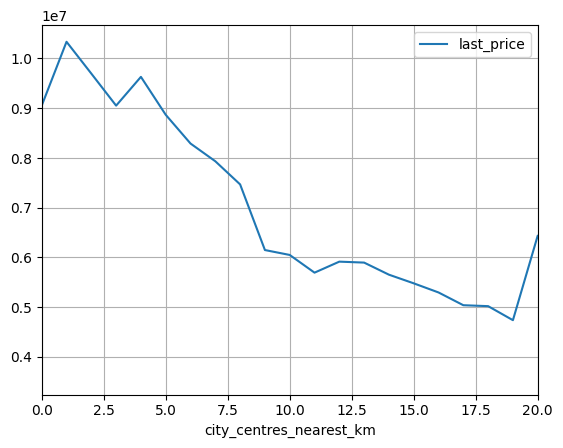

In [72]:
#для красоты и более простого понятие приведем тип отдаленности от центра в целые числа
#по-другому на графике сложно хоть что-то разглядеть
flats['city_centres_nearest_km'] = flats['city_centres_nearest_km'].fillna(0).astype('int')
(
    flats.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centres_nearest_km', values='last_price')
    .plot(kind='line', grid=True, xlim=(0,20))
)

Цена падает в зависимости от удаленности от центра, причем в районе 6 км цена падает быстрее, видимо это считается радиусом центра города.

### Зависимость различных факторов на общую стоимость квартиры

Для того, чтобы было визуально видно зависимость стоимости от различных параметров будем строить графики, а также считать, где это возможно, корреляцию между этими величинами.

#### Общая площадь

0.7737976192581435


<AxesSubplot:xlabel='total_area'>

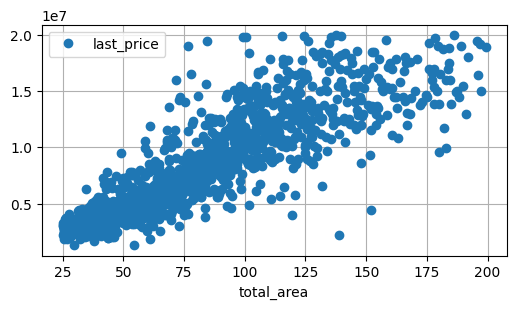

In [73]:
print(flats['total_area'].corr(flats['last_price']))
(
    flats.pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(6,3), style='o')
)

Вывод очевиден: чем больше площадь, тем больше цена квартиры, корреляция 0,77 при этом довольно высокая, что еще раз подтверждает вывод.

#### Площадь кухни

0.5464470714915185


<AxesSubplot:xlabel='kitchen_area'>

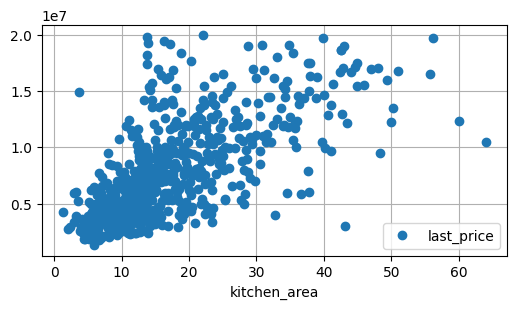

In [74]:
print(flats['kitchen_area'].corr(flats['last_price']))
(
    flats.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(6,3), style='o')
)

Тут разброс уже сильнее, однако все же общая тенденция увеличения цены по мере увеличения площади кузни просмтаривается, корреляция 0,55.

#### Жилая площадь

0.6308071950482054


<AxesSubplot:xlabel='living_area'>

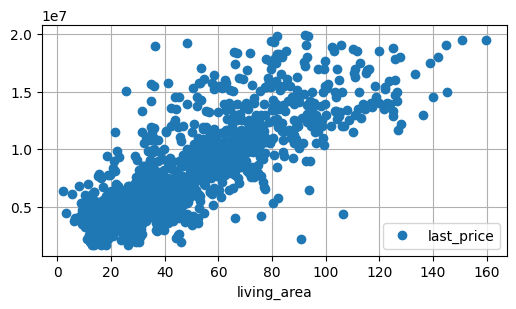

In [75]:
print(flats['living_area'].corr(flats['last_price']))
(
    flats.pivot_table(index='living_area', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(6,3), style='o')
)

Зависимость сильнее чем от площади кухни, но слабее, чем от общей площади, корреляция 0,63.

#### Количество комнат

0.4986197783722433


<AxesSubplot:xlabel='rooms'>

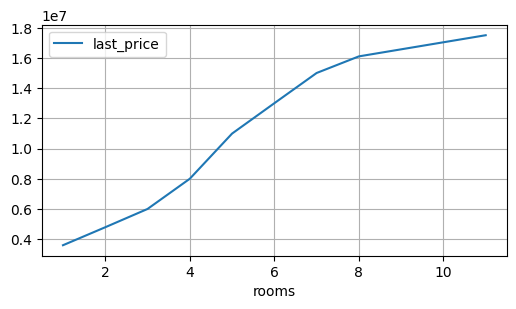

In [76]:
print(flats['rooms'].corr(flats['last_price']))
(
    flats.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(6,3))
)

Тут примерно то же самое, что и с площадью, чуть менее зависимо, кореляция 0,5.

#### Тип этажа

<AxesSubplot:xlabel='type_of_floor'>

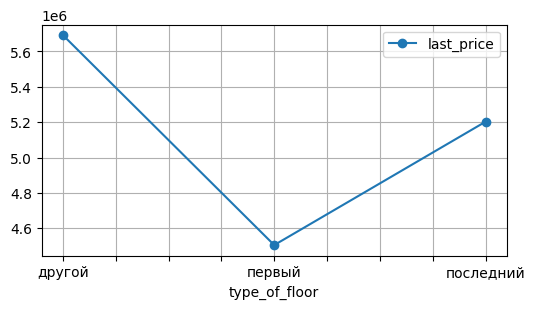

In [77]:
(
    flats.pivot_table(index='type_of_floor', values='last_price')
    .plot(grid=True, figsize=(6,3), style='o-')
)

Здесь можно заметить следущее: квартиры на первом этаже стоят дешевле, чем на последнем, а на последнем дешевле, чем на любом другом.

#### Дата размещения

- от дня недели

<AxesSubplot:xlabel='weekday_of_publication'>

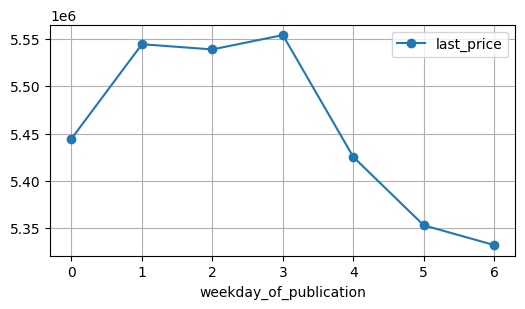

In [78]:
(
    flats.pivot_table(index='weekday_of_publication', values='last_price')
    .plot(grid=True, figsize=(6,3), style='o-')
)

Какой-то четкой зависимости нет. Можно только утверждать, что с понедельника по четверг цена немного возрастает, а потом до воскресенья падает.

- от месяца

<AxesSubplot:xlabel='month_of_publication'>

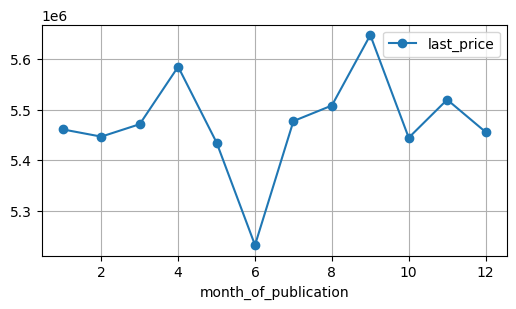

In [79]:
(
    flats.pivot_table(index='month_of_publication', values='last_price')
    .plot(grid=True, figsize=(6,3), style='o-')
)

Какой-либо зависимости не наблюдается. Единственное, бросается в глаза, что в июне цены сильно занижаются.

- от года

<AxesSubplot:xlabel='year_of_publication'>

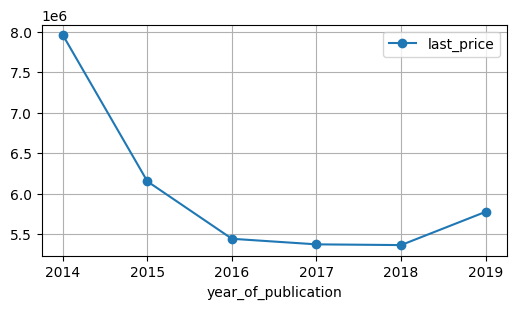

In [80]:
(
    flats.pivot_table(index='year_of_publication', values='last_price')
    .plot(grid=True, figsize=(6,3), style='o-')
)

С 2014 по 2016 года квартиры сильно подешевели, видимо, из-за кризиса, потом два года цены были стабильны и в 2018 году начали подниматься.

### Общий вывод

Было проведено исследование, в котором выявлялась взаимосвязь между разными факторами и ценой квартир. Для разбора была получена статистика объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за 2014 - 2019 года от Яндекс.Недвижимости.

Перед началом исследования были выбраны факторы, которые могут влиять на стоимость квартиры:
1. Площадь
2. Количество комнат
3. Тип этажа
4. Дата размещения
5. Расстояние от центра

В результате исследования получилось выявить следующие зависимости:

**Влияние фактора 1:**
Чем больше площадь, тем больше цена квартиры, корреляция между величинами 0,77 - довольно высокая, что подтверждает данную взаимосвязь.

**Влияние фактора 2:**
Взаимосвязь практически такая же, что и с площадью: больше комнат(как следствие и больше площадь) - дороже квартира. Корреляция равна 0,5. 

**Влияние фактора 3:**
в данном случае удалось выявить следущее: первый этаж самый дешевый, последний этаж немного дороже и еще дороже любые этажи кроме первого и последнего.

**Влияние фактора 4:**
Какой-либо зависимости от дня недели или месяца публикации выявлено не было, исключение: в июне цены падают. По поводу года установлено: с 2014 по 2016 года квартиры сильно подешевели, видимо, из-за кризиса, потом два года цены были стабильны и в 2018 году начали подниматься.

**Влияние фактора 5:** Цена падает в зависимости от удаленности от центра, причем в районе 6 км цена падает быстрее, видимо, это считается радиусом центра города.

Также найдены самые дорогие квартиры и сами дешевые:
- Санкт-Петербург: 1 кв м стоит около 108 000
- поселок Житково: 1 кв м стоит около 16 000
Разница очевидна, это и логично Санкт-Петербург - большой город с развитой инфраструктурой, куда многие хотят переехать, а с другой стороны небольшой поселок, спрос на жидье в котором явно не велик.

Что касается сроков публикации квартир, то чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
